In [1]:
import pandas as pd

# 1. قراءة البيانات من ملف الـ CSV
# تأكد إن اسم الملف مطابق للي عندك
df = pd.read_csv('amazon.csv')

print("--- شكل البيانات قبل التنظيف ---")
print(df[['discounted_price', 'actual_price', 'rating_count', 'category']].head())

# ==========================================
# مرحلة التنظيف (Data Cleaning)
# ==========================================

# 2. تنظيف عواميد الأسعار
# المشكلة: الأسعار جاية كنصوص (Strings) وفيها رموز عملة (زي ₹ أو $) وفواصل (,)
# الحل: هنشيل الرموز والفواصل، وبعدين نحول العمود كله لنوع أرقام عشرية (float)
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').str.replace('$', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').str.replace('$', '').astype(float)

# 3. تنظيف عمود عدد التقييمات
# المشكلة: الأرقام الكبيرة مكتوبة بفاصلة زي 1,500 وده بيخلي البايثون يقراها كنص
# الحل: إزالة الفاصلة والتحويل لأرقام
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

# 4. تنظيف عمود التقييم نفسه (Rating)
# المشكلة: الداتا دي بالذات فيها أحياناً قيم غريبة في التقييم (زي رمز '|') بالغلط
# الحل: دالة to_numeric بتحول العمود لأرقام، و errors='coerce' بتحول أي قيمة مش رقمية لـ NaN (قيمة مفقودة) عشان منبوظش الكود
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 5. معالجة النصوص: استخراج الفئة الرئيسية (Main Category)
# المشكلة: الفئات متداخلة زي "Electronics|Mobiles|Accessories"
# الحل: هنفصل النص بناءً على علامة '|' وناخد أول جزء (اللي هو الـ index رقم 0)
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

# ==========================================
# مراجعة النتائج
# ==========================================

print("\n--- شكل البيانات بعد التنظيف ---")
print(df[['discounted_price', 'actual_price', 'rating_count', 'main_category']].head())

print("\n--- أنواع البيانات الجديدة (Data Types) ---")
print(df[['discounted_price', 'actual_price', 'rating_count', 'rating']].dtypes)

c:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.7' currently installed).
  from pandas.core import (


--- شكل البيانات قبل التنظيف ---
  discounted_price actual_price rating_count  \
0             ₹399       ₹1,099       24,269   
1             ₹199         ₹349       43,994   
2             ₹199       ₹1,899        7,928   
3             ₹329         ₹699       94,363   
4             ₹154         ₹399       16,905   

                                            category  
0  Computers&Accessories|Accessories&Peripherals|...  
1  Computers&Accessories|Accessories&Peripherals|...  
2  Computers&Accessories|Accessories&Peripherals|...  
3  Computers&Accessories|Accessories&Peripherals|...  
4  Computers&Accessories|Accessories&Peripherals|...  

--- شكل البيانات بعد التنظيف ---
   discounted_price  actual_price  rating_count          main_category
0             399.0        1099.0       24269.0  Computers&Accessories
1             199.0         349.0       43994.0  Computers&Accessories
2             199.0        1899.0        7928.0  Computers&Accessories
3             329.0         69

In [2]:
# 1. تجميع البيانات حسب الفئة الرئيسية لمعرفة عدد المنتجات ومتوسط التقييم
category_stats = df.groupby('main_category').agg(
    total_products=('rating', 'count'), # عدد المنتجات في كل فئة
    avg_rating=('rating', 'mean')       # متوسط تقييم الفئة
).reset_index()

# 2. ترتيب الفئات من الأكبر للأصغر بناءً على عدد المنتجات
top_categories = category_stats.sort_values(by='total_products', ascending=False)

# 3. طباعة تقرير سريع للعميل
print("--- تقرير سريع لأهم فئات المنتجات ---")
print(top_categories.head())

--- تقرير سريع لأهم فئات المنتجات ---
           main_category  total_products  avg_rating
2            Electronics             526    4.081749
1  Computers&Accessories             453    4.154967
4           Home&Kitchen             447    4.040716
7         OfficeProducts              31    4.309677
5        HomeImprovement               2    4.250000


C:\Users\DELL\AppData\Local\Temp\ipykernel_9336\3132998301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


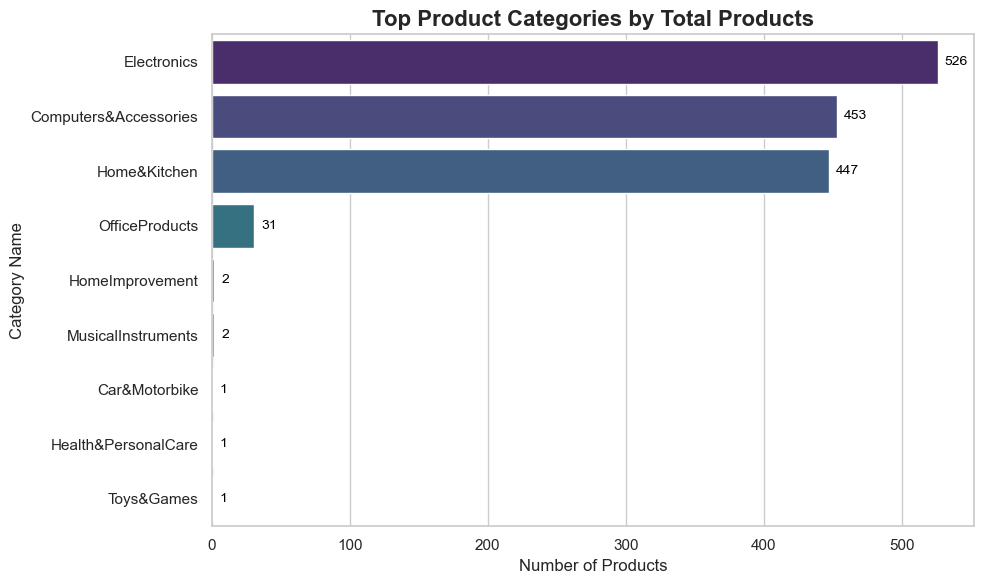

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. إعداد الشكل العام للرسمة (عشان تطلع شيك واحترافية)
sns.set_theme(style="whitegrid") # خلفية مخططة بتسهل قراءة الأرقام
plt.figure(figsize=(10, 6))      # تحديد حجم الصورة (العرض والطول)

# 2. رسم الأعمدة (Bar Chart)
# هنخلي الفئات على محور الصادات (y) عشان أساميها الطويلة تتقري بسهولة
# وعدد المنتجات على محور السينات (x)
ax = sns.barplot(
    x='total_products', 
    y='main_category', 
    data=top_categories, 
    palette='viridis' # اختيار مجموعة ألوان متناسقة
)

# 3. إضافة العناوين والتفاصيل
plt.title('Top Product Categories by Total Products', fontsize=16, fontweight='bold')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Category Name', fontsize=12)

# 4. إضافة الرقم فوق كل عمود (لمسة احترافية جداً للعميل)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, color='black')

# 5. عرض الرسمة
plt.tight_layout()
plt.show()

In [4]:
pip install wordcloud

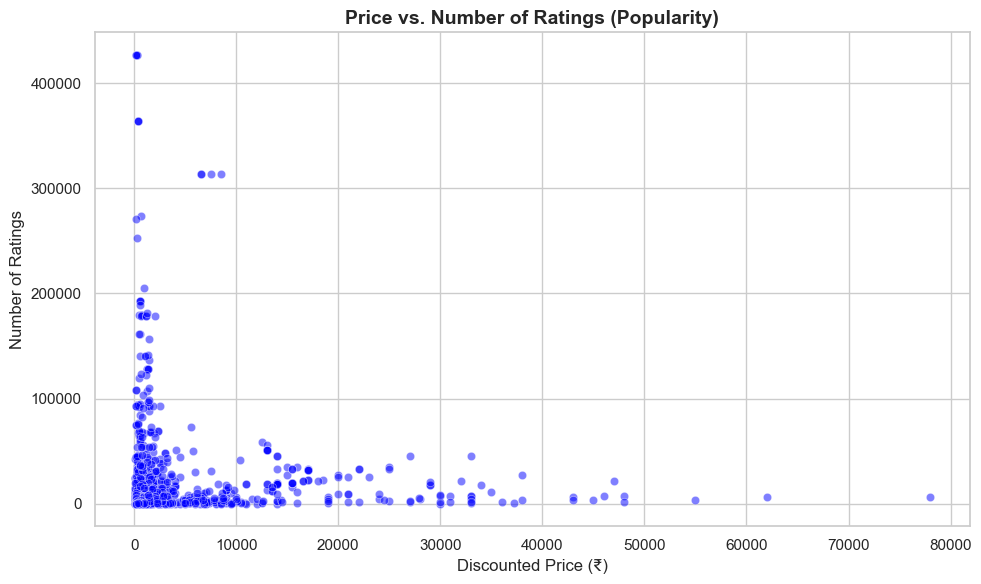

In [6]:
from wordcloud import WordCloud, STOPWORDS

# ==========================================
# خطوة تحضيرية سريعة: تنظيف نسبة الخصم
# ==========================================
# نسينا ننظف عمود الخصم في المرة اللي فاتت لأنه كان مكتوب كنص وفي علامة %
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# إعداد شكل الرسومات
sns.set_theme(style="whitegrid")

# ==========================================
# 1. تأثير السعر على حجم التفاعل (Price vs. Popularity)
# ==========================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating_count', alpha=0.5, color='blue')
plt.title('Price vs. Number of Ratings (Popularity)', fontsize=14, fontweight='bold')
plt.xlabel('Discounted Price (₹)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.tight_layout()
plt.show()
# النتيجة: هتلاحظ إن معظم التفاعل (النقاط العالية) متجمع في المنتجات اللي سعرها رخيص أو متوسط.

C:\Users\DELL\AppData\Local\Temp\ipykernel_9336\3718710080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_stats, x='discount_tier', y='rating', palette='coolwarm')


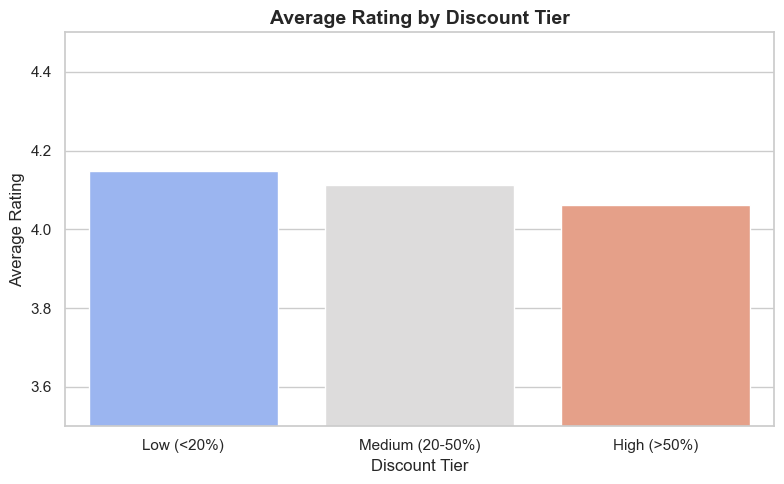

In [7]:
# ==========================================
# 2. تحليل استراتيجية الخصومات (Discount Impact on Rating)
# ==========================================
# هنقسم الخصومات لـ 3 فئات (قليل، متوسط، عالي)
bins = [0, 20, 50, 100]
labels = ['Low (<20%)', 'Medium (20-50%)', 'High (>50%)']
df['discount_tier'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels)

discount_stats = df.groupby('discount_tier', observed=True)['rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=discount_stats, x='discount_tier', y='rating', palette='coolwarm')
plt.title('Average Rating by Discount Tier', fontsize=14, fontweight='bold')
plt.xlabel('Discount Tier', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(3.5, 4.5) # تحديد نطاق المحور عشان الفرق يبان
plt.tight_layout()
plt.show()
# النتيجة: الرسمة دي هتقول للعميل هل الناس بتدي تقييم أعلى لما تاخد خصم كبير ولا لأ.

In [8]:
# ==========================================
# 3. الجودة مقابل التسويق (Description Length vs. Rating)
# ==========================================
# هنحسب عدد الحروف في وصف كل منتج
df['desc_length'] = df['about_product'].astype(str).apply(len)

# نجيب متوسط التقييم للمنتجات حسب طول الوصف (أطول من 500 حرف ولا أقصر)
df['desc_category'] = df['desc_length'].apply(lambda x: 'Detailed ( > 500 chars )' if x > 500 else 'Short ( <= 500 chars )')
desc_stats = df.groupby('desc_category')['rating'].mean().reset_index()

print("\n--- تأثير طول الوصف على التقييم ---")
print(desc_stats)
# النتيجة: جدول صغير بيثبت للعميل هل الاهتمام بكتابة وصف طويل بيزود التقييم ولا ملوش تأثير.


--- تأثير طول الوصف على التقييم ---
              desc_category    rating
0  Detailed ( > 500 chars )  4.094070
1    Short ( <= 500 chars )  4.101646


In [9]:
# ==========================================
# 4. اكتشاف العملاء الأكثر نشاطاً (Super Reviewers)
# ==========================================
# هنفصل الـ User IDs لأن بعض الصفوف فيها كذا مستخدم
all_users = df['user_id'].str.split(',').explode()
top_users = all_users.value_counts().head(5).reset_index()
top_users.columns = ['User ID', 'Number of Reviews']

print("\n--- أنشط 5 عملاء على المتجر ---")
print(top_users)
# النتيجة: قائمة بأكثر العملاء اللي بيكتبوا مراجعات، ودول العميل ممكن يبعتلهم هدايا أو عروض خاصة.


--- أنشط 5 عملاء على المتجر ---
                        User ID  Number of Reviews
0  AE55KTFVNXYFD5FPYWP2OUPEYNPQ                 11
1  AG5DWPD54QGSLWJ6QUFERLPNAX4Q                 11
2  AECPFYFQVRUWC3KGNLJIOREFP5LQ                 10
3  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA                 10
4  AEBWA5I4QFCA3P3OBEPMELBGN4GQ                 10


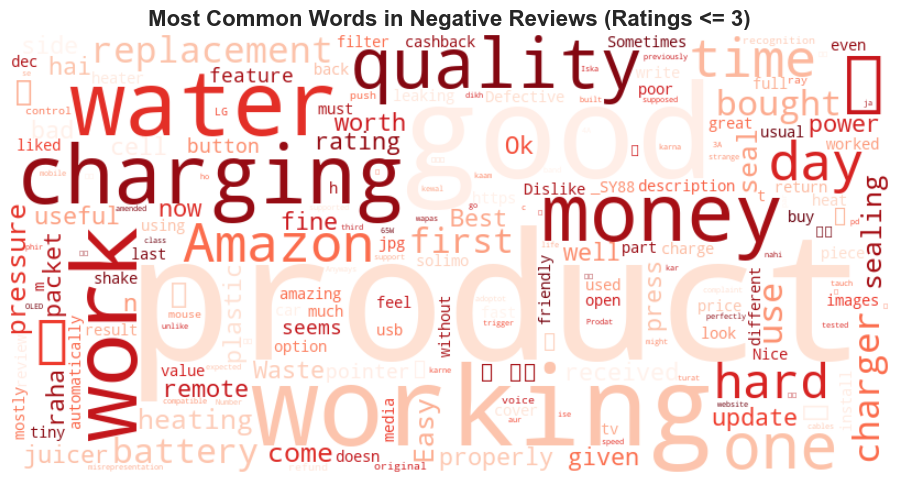

In [10]:
# ==========================================
# 5. الكلمات المفتاحية لشكاوى العملاء (Text Analysis & WordCloud)
# ==========================================
# هنجيب المراجعات اللي تقييمها ضعيف (3 نجوم أو أقل)
negative_reviews = df[df['rating'] <= 3]['review_content'].dropna().astype(str)
text = " ".join(review for review in negative_reviews)

# لو الداتا فيها منتجات بتقييم ضعيف، هنرسم سحابة الكلمات
if len(text) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=STOPWORDS, colormap='Reds').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # إخفاء المحاور
    plt.title('Most Common Words in Negative Reviews (Ratings <= 3)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\nلا يوجد تقييمات سلبية كافية لعمل سحابة الكلمات.")
# النتيجة: رسمة مليانة كلمات، الكلمة اللي حجمها كبير معناها إنها اتكررت كتير في شكاوى الناس (مثلا: battery, broken, late).